<a href="https://colab.research.google.com/github/VeronicaDomR/Laboratoria_proyecto2_hipotesis/blob/main/Hitosproyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Autenticación
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

# Importación de librerías necesarias
from google.cloud import bigquery
import pandas as pd

# Definición del project_id
project_id = 'proyectospotify-426316'
client = bigquery.Client(project=project_id)

# Definición del dataset
dataset = 'dataset'
table = 'dataset3'

# Consulta SQL
query = f"""
SELECT *
FROM {project_id}.{dataset}.{table}
"""

# Ejecutar la consulta y convertir los resultados en un dataframe
df = client.query(query).to_dataframe()

# Mostrar las primeras filas del Dataframe
print(df.head())



Authenticated
  track_id track_name_limpio artist_name_limpio  artist_count release_date  \
0  1406287  I Wanna Be Yours     Arctic Monkeys             1   2013-01-01   
1  3921634       Blank Space       Taylor Swift             1   2014-01-01   
2  4796316             Style       Taylor Swift             1   2014-01-01   
3  4527090            Yellow      Chris Molitor             1   1999-01-01   
4  3126367      Viva La Vida           Coldplay             1   2008-01-01   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2013               1             1                 12859   
1           2014               1             1                 11434   
2           2014               1             1                  7830   
3           1999               1             1                 31358   
4           2008               1             1                 33898   

   in_spotify_charts  ...  speechiness_%  cat_streams  cat_danceability  \
0        

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
artist_count,948.0,1.559072,0.894481,1.0,1.0,1.0,2.0,8.0
released_year,948.0,2018.274262,11.032289,1930.0,2020.0,2022.0,2022.0,2023.0
released_month,948.0,6.037975,3.56722,1.0,3.0,6.0,9.0,12.0
released_day,948.0,13.929325,9.194844,1.0,6.0,13.0,22.0,31.0
in_spotify_playlists,948.0,5209.739451,7914.448305,31.0,874.5,2216.5,5573.75,52898.0
in_spotify_charts,948.0,12.072785,19.608092,0.0,0.0,3.0,16.0,147.0
streams_limpio,948.0,514336542.001055,567797144.656807,2762.0,141636175.0,289165138.5,672942469.0,3703895074.0
total_playlist,947.0,5345.515312,8042.067789,34.0,909.5,2286.0,5793.0,53304.0
in_apple_playlists,947.0,67.746568,86.353563,0.0,13.0,34.0,87.5,672.0
in_apple_charts,947.0,51.991552,50.669679,0.0,7.0,38.0,87.0,275.0


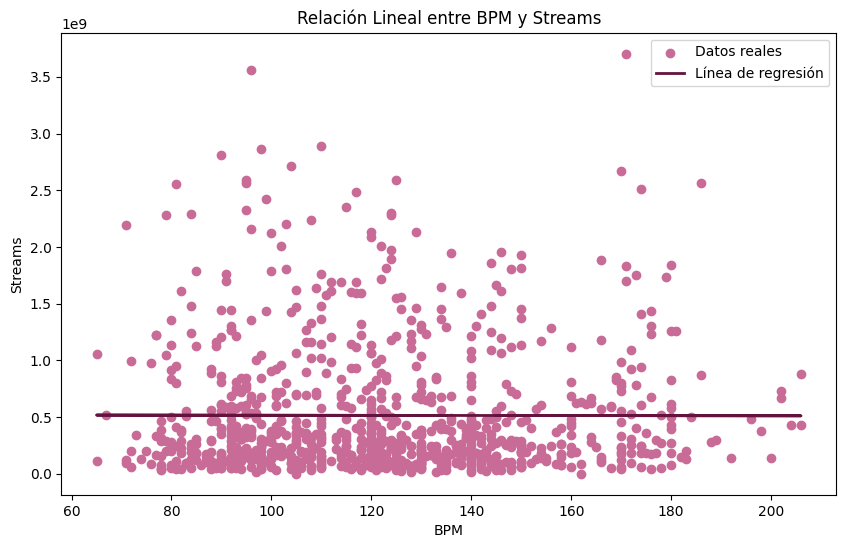

Coeficiente de regresión: -47291.98653672011
Intersección: 520327994.13248307
Coeficiente de Determinación (R²): 5.457847197964938e-06


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Verificar la existencia de las columnas 'bpm' y 'streams_limpio' en el DataFrame
if 'bpm' in df.columns and 'streams_limpio' in df.columns:
    # Limpiar los datos, eliminando filas con valores nulos en 'bpm' o 'streams_limpio'
    df_clean = df[['bpm', 'streams_limpio']].dropna()
    # Extraer las variables independientes (X) y dependientes (y)
    X = df_clean[['bpm']].values
    y = df_clean['streams_limpio'].values.reshape(-1, 1)  # Asegurar que y sea un array 2D
    # Crear y entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X, y)
    # Calcular la predicción de 'streams' en función de 'bpm'
    y_pred = model.predict(X)
    # Visualización de los resultados
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='#c96b97', label='Datos reales')
    plt.plot(X, y_pred, color='#63133e', linewidth=2, label='Línea de regresión')
    plt.xlabel('BPM')
    plt.ylabel('Streams')
    plt.title('Relación Lineal entre BPM y Streams')
    plt.legend()
    # Guardar la figura como un archivo PNG
    plt.savefig('relacion_bpm_streams.png')
    plt.show()

    # Mostrar los coeficientes de la regresión
    print(f'Coeficiente de regresión: {model.coef_[0][0]}')
    print(f'Intersección: {model.intercept_[0]}')
    r2 = r2_score(y, y_pred)
    print('Coeficiente de Determinación (R²):', r2)
else:
    print("Las columnas 'bpm' y 'streams_limpio' no se encuentran en el DataFrame.")




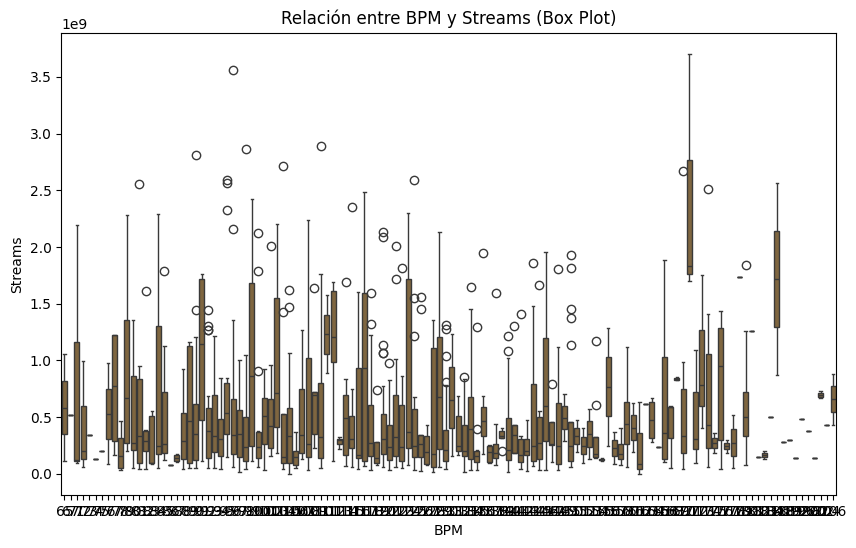

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Verificar la existencia de las columnas 'bpm' y 'streams_limpio' en el DataFrame
if 'bpm' in df.columns and 'streams_limpio' in df.columns:
    # Limpiar los datos, eliminando filas con valores nulos en 'bpm' o 'streams_limpio'
    df_clean = df[['bpm', 'streams_limpio']].dropna()
    # Visualización usando un box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='bpm', y='streams_limpio', data=df_clean, color='#896836')
    plt.xlabel('BPM')
    plt.ylabel('Streams')
    plt.title('Relación entre BPM y Streams (Box Plot)')
    plt.show()
else:
    print("Las columnas 'bpm' y 'streams_limpio' no se encuentran en el DataFrame.")

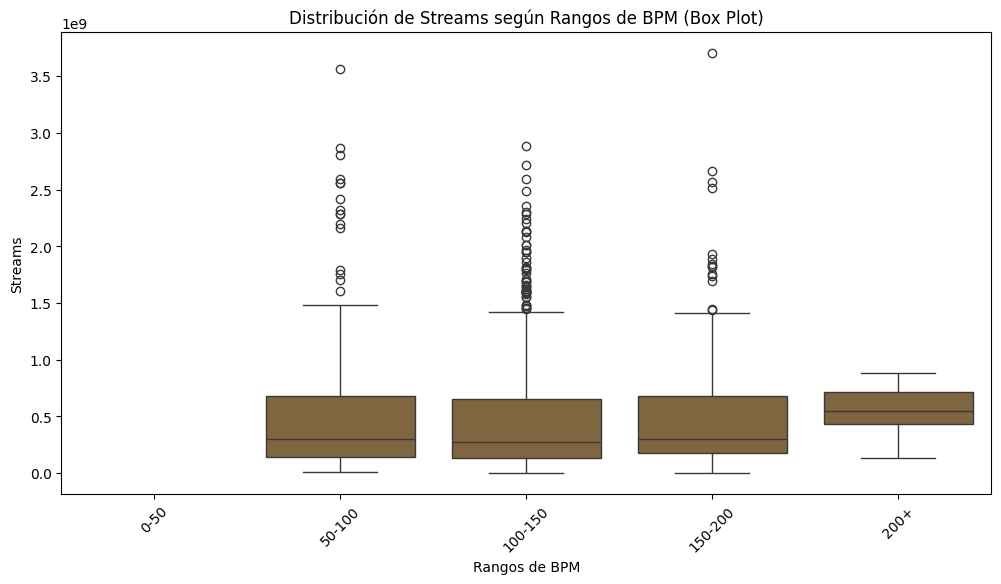

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Verificar la existencia de las columnas 'bpm' y 'streams_limpio' en el DataFrame
if 'bpm' in df.columns and 'streams_limpio' in df.columns:
    # Definir los rangos para 'bpm' (ejemplo, puedes ajustar según tu necesidad)
    bpm_ranges = [0, 50, 100, 150, 200, np.inf]
    labels = ['0-50', '50-100', '100-150', '150-200', '200+']
    # Categorizar los valores de 'bpm' en los rangos definidos
    df['bpm_range'] = pd.cut(df['bpm'], bins=bpm_ranges, labels=labels, right=False)
    # Limpiar los datos, eliminando filas con valores nulos en 'bpm_range' o 'streams_limpio'
    df_clean = df[['bpm_range', 'streams_limpio']].dropna()
    # Visualización usando un box plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='bpm_range', y='streams_limpio', data=df_clean, color='#896836', order=labels)
    plt.xlabel('Rangos de BPM')
    plt.ylabel('Streams')
    plt.title('Distribución de Streams según Rangos de BPM (Box Plot)')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Las columnas 'bpm' y 'streams_limpio' no se encuentran en el DataFrame.")

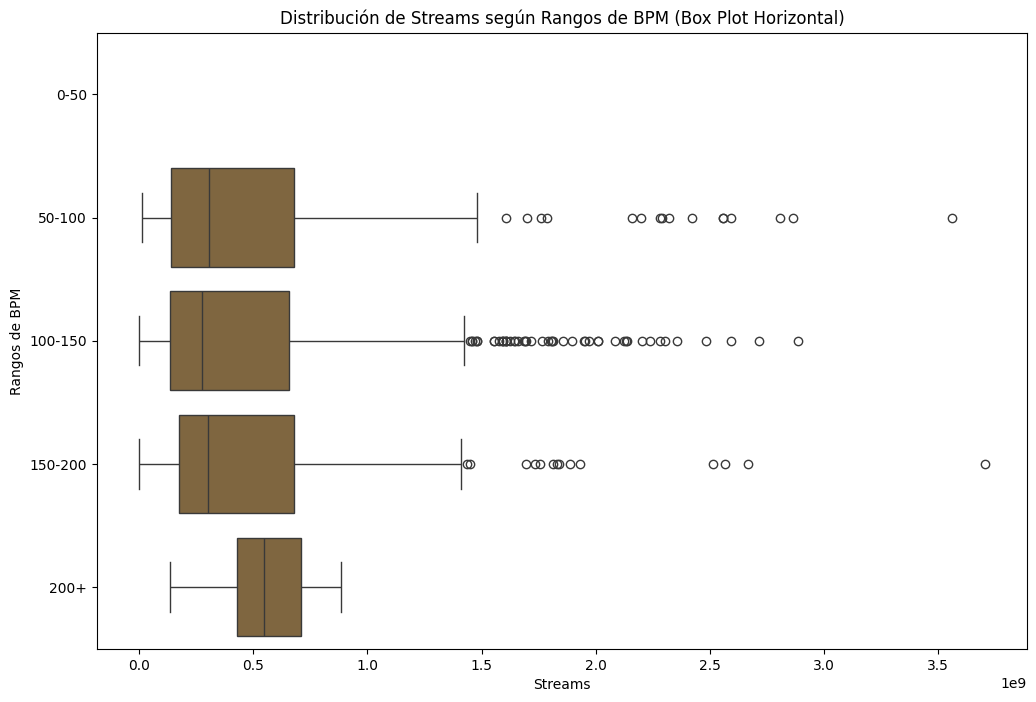

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
# Verificar la existencia de las columnas 'bpm' y 'streams_limpio' en el DataFrame
if 'bpm' in df.columns and 'streams_limpio' in df.columns:
    # Definir los rangos para 'bpm' (ejemplo, puedes ajustar según tu necesidad)
    bpm_ranges = [0, 50, 100, 150, 200, np.inf]
    labels = ['0-50', '50-100', '100-150', '150-200', '200+']
    # Categorizar los valores de 'bpm' en los rangos definidos
    df['bpm_range'] = pd.cut(df['bpm'], bins=bpm_ranges, labels=labels, right=False)
    # Limpiar los datos, eliminando filas con valores nulos en 'bpm_range' o 'streams_limpio'
    df_clean = df[['bpm_range', 'streams_limpio']].dropna()
    # Visualización usando un box plot horizontal
    plt.figure(figsize=(12, 8))
    box_plot = sns.boxplot(y='bpm_range', x='streams_limpio', data=df_clean, color='#896836', order=labels)
    # Añadir etiquetas a los puntos atípicos (outliers)
    for i, box in enumerate(box_plot.artists):
        for j in range(i*6, i*6 + 6):
            line = box_plot.lines[j]
            x, y = line.get_xydata()[0]
            if j == i*6 + 4:
                x, y = line.get_xydata()[1]
                box_plot.text(x, y, f'{int(x)}', color='red', ha='center', va='bottom')
    # Etiquetas y título
    plt.xlabel('Streams')
    plt.ylabel('Rangos de BPM')
    plt.title('Distribución de Streams según Rangos de BPM (Box Plot Horizontal)')
    plt.show()
else:
    print("Las columnas 'bpm' y 'streams_limpio' no se encuentran en el DataFrame.")

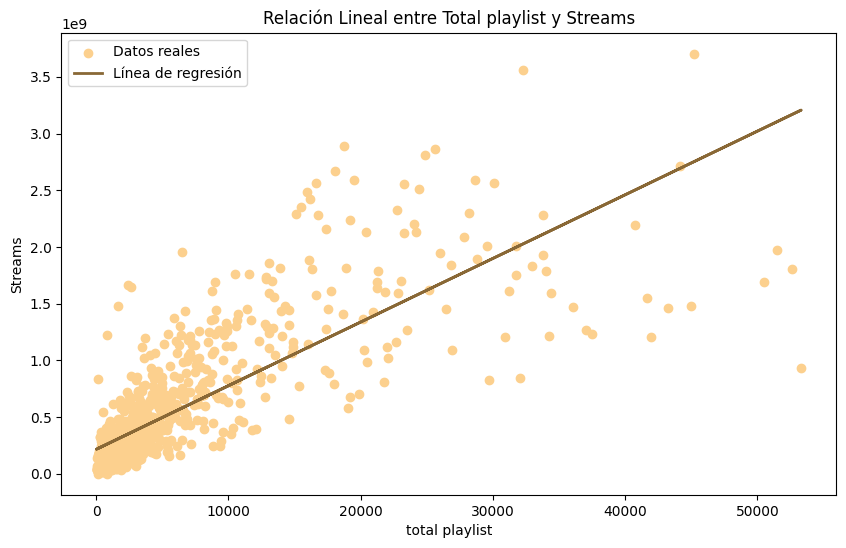

Coeficiente de regresión: 56127.015477967085
Intersección: 214508028.77654546


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Verificar que las columnas 'total_playlist' y 'streams' existen en el DataFrame
if 'bpm' in df.columns and 'streams_limpio' in df.columns:
    # Limpiar los datos, eliminando filas con valores nulos en 'total_playlist' o 'streams'
    df_clean = df[['total_playlist', 'streams_limpio']].dropna()
    # Extraer las variables independientes (X) y dependientes (y)
    X = df_clean[['total_playlist']].values
    y = df_clean['streams_limpio'].values
    # Crear y entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X, y)
    # Calcular la predicción de 'streams' en función de 'total_playlist'
    y_pred = model.predict(X)
    # Visualización de los resultados
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='#FCD08E', label='Datos reales')
    plt.plot(X, y_pred, color='#896836', linewidth=2, label='Línea de regresión')
    plt.xlabel('total playlist')
    plt.ylabel('Streams')
    plt.title('Relación Lineal entre Total playlist y Streams')
    plt.legend()
    plt.show()
    # Mostrar los coeficientes de la regresión
    print(f'Coeficiente de regresión: {model.coef_[0]}')
    print(f'Intersección: {model.intercept_}')
else:
    print("Las columnas 'total_playlist' y 'streams' no se encuentran en el DataFrame.")


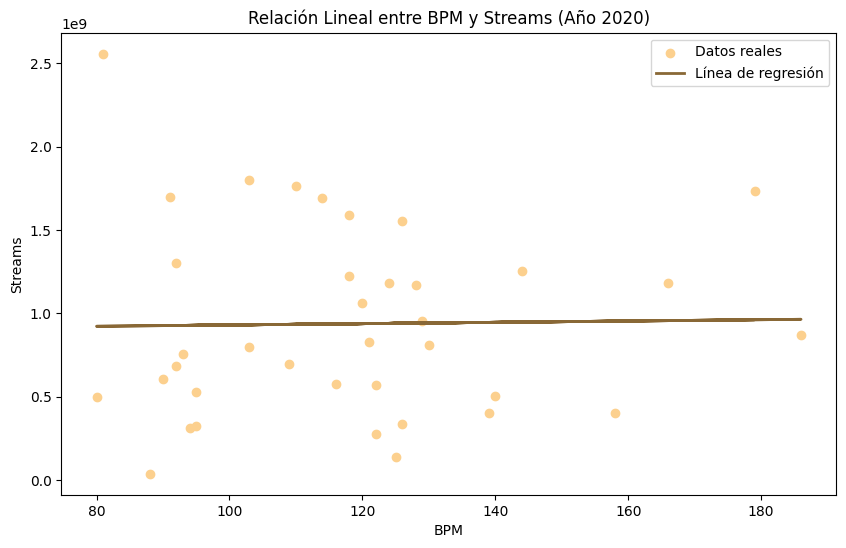

Coeficiente de regresión: 394381.1807779722
Intersección: 891391060.5552052


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Filtrar las canciones con año de lanzamiento igual a 2020
df_2020 = df[df['released_year'] == 2020]

# Verificar la existencia de las columnas 'bpm' y 'streams_limpio' en el DataFrame
if 'bpm' in df_2020.columns and 'streams_limpio' in df_2020.columns:
    # Limpiar los datos, eliminando filas con valores nulos en 'bpm' o 'streams_limpio'
    df_clean = df_2020[['bpm', 'streams_limpio']].dropna()
    # Extraer las variables independientes (X) y dependientes (y)
    X = df_clean[['bpm']].values
    y = df_clean['streams_limpio'].values.reshape(-1, 1)  # Asegurar que y sea un array 2D
    # Crear y entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X, y)
    # Calcular la predicción de 'streams' en función de 'bpm'
    y_pred = model.predict(X)
    # Visualización de los resultados
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='#FCD08E', label='Datos reales')
    plt.plot(X, y_pred, color='#896836', linewidth=2, label='Línea de regresión')
    plt.xlabel('BPM')
    plt.ylabel('Streams')
    plt.title('Relación Lineal entre BPM y Streams (Año 2020)')
    plt.legend()
    plt.show()
    # Mostrar los coeficientes de la regresión
    print(f'Coeficiente de regresión: {model.coef_[0][0]}')
    print(f'Intersección: {model.intercept_[0]}')
else:
    print("Las columnas 'bpm' y 'streams_limpio' no se encuentran en el DataFrame.")


In [ ]:
# Autenticación
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

# Importación de librerías necesarias
from google.cloud import bigquery
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu

# Definición del project_id
project_id = 'proyectospotify-426316'
client = bigquery.Client(project=project_id)

# Definición del dataset
dataset = 'dataset'
table = 'dataset3'

# Consulta SQL
query = f"""
SELECT *
FROM `{project_id}.{dataset}.{table}`
"""

# Ejecutar la consulta y convertir los resultados en un dataframe
df = client.query(query).to_dataframe()

# Mostrar las primeras filas del Dataframe
print(df.head())

# Asegúrate de que no haya valores nulos en las columnas que se van a usar
if 'cuartiles_streams' in df.columns and 'bpm' in df.columns:
    df = df.dropna(subset=['cuartiles_streams', 'bpm'])

    # Filtrar los grupos en función de los cuartiles y BPM
    grupo_alto_bpm = df[df['cuartiles_streams'] == 4]['bpm']
    grupo_bajo_bpm = df[df['cuartiles_streams'].isin([1, 2, 3])]['bpm']

    # Verificar el contenido de los grupos
    print(f'Grupo alto BPM:\n{grupo_alto_bpm.describe()}')
    print(f'Grupo bajo BPM:\n{grupo_bajo_bpm.describe()}')

    # Prueba t de Student
    stat_t, p_value_t = ttest_ind(grupo_alto_bpm, grupo_bajo_bpm, equal_var=False)

    print(f'Test t - Estadístico t: {stat_t}')
    print(f'Test t - Valor p: {p_value_t}')

    # Prueba U de Mann-Whitney
    stat_u, p_value_u = mannwhitneyu(grupo_alto_bpm, grupo_bajo_bpm, alternative='two-sided')

    print(f'Wilcoxon (Mann-Whitney U) - Estadístico U: {stat_u}')
    print(f'Wilcoxon (Mann-Whitney U) - Valor p: {p_value_u}')
else:
    print("Las columnas 'cuartiles_streams' y 'bpm' no existen en el DataFrame.")


Authenticated
  track_id track_name_limpio artist_name_limpio  artist_count release_date  \
0  1406287  I Wanna Be Yours     Arctic Monkeys             1   2013-01-01   
1  3921634       Blank Space       Taylor Swift             1   2014-01-01   
2  4796316             Style       Taylor Swift             1   2014-01-01   
3  4527090            Yellow      Chris Molitor             1   1999-01-01   
4  3126367      Viva La Vida           Coldplay             1   2008-01-01   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2013               1             1                 12859   
1           2014               1             1                 11434   
2           2014               1             1                  7830   
3           1999               1             1                 31358   
4           2008               1             1                 33898   

   in_spotify_charts  ...  speechiness_%  cat_streams  cat_danceability  \
0        

In [ ]:
# Autenticación
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

# Importación de librerías necesarias
from google.cloud import bigquery
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu

# Definición del project_id
project_id = 'proyectospotify-426316'
client = bigquery.Client(project=project_id)

# Definición del dataset
dataset = 'dataset'
table = 'dataset3'

# Consulta SQL
query = f"""
SELECT *
FROM {project_id}.{dataset}.{table}
"""

# Ejecutar la consulta y convertir los resultados en un dataframe
df = client.query(query).to_dataframe()

# Mostrar las primeras filas del Dataframe
print(df.head())

# Transformar las columnas 'cat_streams' y 'cat_bpm' de string a numéricas
stream_mapping = {'bajo': 1, 'alto': 4}
bpm_mapping = {'bajo': 1,'alto': 4}

df['cuartiles_streams'] = df['cat_streams'].map(stream_mapping)
df['cuartiles_bpm'] = df['cat_bpm'].map(bpm_mapping)

# Asegurarse de que no haya valores nulos en las columnas que se van a usar
df = df.dropna(subset=['cuartiles_streams', 'cuartiles_bpm'])

# Filtrar los grupos en función de los cuartiles
grupo_alto_bpm = df[df['cuartiles_streams'] == 4]['cuartiles_bpm']
grupo_bajo_bpm = df[df['cuartiles_streams'] == 1]['cuartiles_bpm']

# Verificar el contenido de los grupos
print(f'Número de tracks en el grupo alto BPM: {len(grupo_alto_bpm)}')
print(f'Número de tracks en el grupo bajo BPM: {len(grupo_bajo_bpm)}')
print(f'Grupo alto BPM:\n{grupo_alto_bpm.describe()}')
print(f'Grupo bajo BPM:\n{grupo_bajo_bpm.describe()}')

# Prueba t de Student
stat_t, p_value_t = ttest_ind(grupo_alto_bpm, grupo_bajo_bpm, equal_var=False)

print(f'Test t - Estadístico t: {stat_t}')
print(f'Test t - Valor p: {p_value_t}')

# Prueba U de Mann-Whitney
stat_u, p_value_u = mannwhitneyu(grupo_alto_bpm, grupo_bajo_bpm, alternative='two-sided')

print(f'Wilcoxon (Mann-Whitney U) - Estadístico U: {stat_u}')
print(f'Wilcoxon (Mann-Whitney U) - Valor p: {p_value_u}')

Authenticated
  track_id track_name_limpio artist_name_limpio  artist_count release_date  \
0  1406287  I Wanna Be Yours     Arctic Monkeys             1   2013-01-01   
1  3921634       Blank Space       Taylor Swift             1   2014-01-01   
2  4796316             Style       Taylor Swift             1   2014-01-01   
3  4527090            Yellow      Chris Molitor             1   1999-01-01   
4  3126367      Viva La Vida           Coldplay             1   2008-01-01   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2013               1             1                 12859   
1           2014               1             1                 11434   
2           2014               1             1                  7830   
3           1999               1             1                 31358   
4           2008               1             1                 33898   

   in_spotify_charts  ...  speechiness_%  cat_streams  cat_danceability  \
0        

In [ ]:
# Autenticación
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

# Importación de librerías necesarias
from google.cloud import bigquery
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu

# Definición del project_id
project_id = 'proyectospotify-426316'
client = bigquery.Client(project=project_id)

# Definición del dataset
dataset = 'dataset'
table = 'dataset3'

# Consulta SQL
query = f"""
SELECT cat_speechiness, cat_liveness, cat_instrumentalness, cat_acousticness, cat_energy, cat_valence, cat_danceability
FROM {project_id}.{dataset}.{table}
"""

# Ejecutar la consulta y convertir los resultados en un DataFrame
df = client.query(query).to_dataframe()

# Mostrar las primeras filas del Dataframe
print(df.head())

# Transformar las columnas de cadenas a valores numéricos
transform_map = {'alto': 4, 'medio-alto': 3, 'medio-bajo': 2, 'bajo': 1}
df['cuartiles_speechiness'] = df['cat_speechiness'].map(transform_map)
df['cuartiles_liveness'] = df['cat_liveness'].map(transform_map)
df['cuartiles_instrumentalness'] = df['cat_instrumentalness'].map(transform_map)
df['cuartiles_acousticness'] = df['cat_acousticness'].map(transform_map)
df['cuartiles_energy'] = df['cat_energy'].map(transform_map)
df['cuartiles_valence'] = df['cat_valence'].map(transform_map)
df['cuartiles_danceability'] = df['cat_danceability'].map(transform_map)

# Lista de características a analizar
features = ['cuartiles_speechiness', 'cuartiles_liveness', 'cuartiles_instrumentalness', 'cuartiles_acousticness', 'cuartiles_energy', 'cuartiles_valence', 'cuartiles_danceability']

# Filtrar y analizar los grupos
for feature in features:
    if feature in df.columns:
        # Filtrar valores no nulos
        df_filtered = df.dropna(subset=[feature])

        # Dividir los datos en dos grupos basado en la mediana
        median_value = df_filtered[feature].median()
        grupo_alto = df_filtered[df_filtered[feature] > median_value][feature]
        grupo_bajo = df_filtered[df_filtered[feature] <= median_value][feature]

        # Verificar el contenido de los grupos
        print(f'Grupo alto {feature} (n={grupo_alto.count()}):\n{grupo_alto.describe()}')
        print(f'Grupo bajo {feature} (n={grupo_bajo.count()}):\n{grupo_bajo.describe()}')

        # Prueba t de Student
        stat_t, p_value_t = ttest_ind(grupo_alto, grupo_bajo, equal_var=False)
        print(f'Test t - {feature} - Estadístico t: {stat_t}')
        print(f'Test t - {feature} - Valor p: {p_value_t}')

        # Prueba U de Mann-Whitney
        stat_u, p_value_u = mannwhitneyu(grupo_alto, grupo_bajo, alternative='two-sided')
        print(f'Wilcoxon (Mann-Whitney U) - {feature} - Estadístico U: {stat_u}')
        print(f'Wilcoxon (Mann-Whitney U) - {feature} - Valor p: {p_value_u}')

Authenticated
  cat_speechiness cat_liveness cat_instrumentalness cat_acousticness  \
0            bajo         bajo                 alto             bajo   
1            bajo         bajo                 bajo             bajo   
2            bajo         bajo                 alto             bajo   
3            bajo         bajo                 bajo             bajo   
4            bajo         bajo                 bajo             bajo   

  cat_energy cat_valence cat_danceability  
0       bajo        bajo             bajo  
1       bajo        bajo             bajo  
2       alto        bajo             bajo  
3       bajo        bajo             bajo  
4       bajo        bajo             bajo  
Grupo alto cuartiles_speechiness (n=237):
count    237.0
mean       4.0
std        0.0
min        4.0
25%        4.0
50%        4.0
75%        4.0
max        4.0
Name: cuartiles_speechiness, dtype: float64
Grupo bajo cuartiles_speechiness (n=711):
count    711.0
mean       1.0
std        

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment 

In [ ]:
# Importar librerías
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu

# Configurar NumPy para no mostrar números en notación exponencial y limitar a 4 decimales
np.set_printoptions(suppress=True, precision=4)

# Configurar Pandas para no mostrar números en notación exponencial y limitar a 4 decimales
pd.options.display.float_format = '{:.4f}'.format

# Filtrar y analizar los grupos
for feature in features:
    if feature in df.columns:
        # Filtrar valores no nulos
        df_filtered = df.dropna(subset=[feature])

        # Verificar variabilidad en los datos originales
        unique_values = df_filtered[feature].nunique()
        print(f'{feature} tiene {unique_values} valores únicos.')

        if unique_values > 1:
            # Dividir los datos en dos grupos basado en la mediana
            median_value = df_filtered[feature].median()
            grupo_alto = df_filtered[df_filtered[feature] > median_value][feature]
            grupo_bajo = df_filtered[df_filtered[feature] <= median_value][feature]

            # Verificar el contenido de los grupos
            print(f'Grupo alto {feature} (n={grupo_alto.count()}):\n{grupo_alto.describe()}')
            print(f'Grupo bajo {feature} (n={grupo_bajo.count()}):\n{grupo_bajo.describe()}')

            # Prueba t de Student
            stat_t, p_value_t = ttest_ind(grupo_alto, grupo_bajo, equal_var=False)
            print(f'Test t - {feature} - Estadístico t: {stat_t:.4f}')
            print(f'Test t - {feature} - Valor p: {p_value_t:.4f}')

            # Prueba U de Mann-Whitney
            stat_u, p_value_u = mannwhitneyu(grupo_alto, grupo_bajo, alternative='two-sided')
            print(f'Wilcoxon (Mann-Whitney U) - {feature} - Estadístico U: {stat_u:.4f}')
            print(f'Wilcoxon (Mann-Whitney U) - {feature} - Valor p: {p_value_u:.4f}')
        else:
            print(f'La característica {feature} no tiene suficiente variabilidad para realizar pruebas estadísticas.')



cuartiles_speechiness tiene 2 valores únicos.
Grupo alto cuartiles_speechiness (n=237):
count   237.0000
mean      4.0000
std       0.0000
min       4.0000
25%       4.0000
50%       4.0000
75%       4.0000
max       4.0000
Name: cuartiles_speechiness, dtype: float64
Grupo bajo cuartiles_speechiness (n=711):
count   711.0000
mean      1.0000
std       0.0000
min       1.0000
25%       1.0000
50%       1.0000
75%       1.0000
max       1.0000
Name: cuartiles_speechiness, dtype: float64
Test t - cuartiles_speechiness - Estadístico t: inf
Test t - cuartiles_speechiness - Valor p: 0.0000
Wilcoxon (Mann-Whitney U) - cuartiles_speechiness - Estadístico U: 168507.0000
Wilcoxon (Mann-Whitney U) - cuartiles_speechiness - Valor p: 0.0000
cuartiles_liveness tiene 2 valores únicos.
Grupo alto cuartiles_liveness (n=237):
count   237.0000
mean      4.0000
std       0.0000
min       4.0000
25%       4.0000
50%       4.0000
75%       4.0000
max       4.0000
Name: cuartiles_liveness, dtype: float64
Gru

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment 

In [ ]:
# Autenticación
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

# Importación de librerías necesarias
from google.cloud import bigquery
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu

# Definición del project_id
project_id = 'proyectospotify-426316'
client = bigquery.Client(project=project_id)

# Definición del dataset
dataset = 'dataset'
table = 'dataset3'

# Consulta SQL
query = f"""
SELECT cat_speechiness, cat_liveness, cat_instrumentalness, cat_acousticness, cat_energy, cat_valence, cat_danceability
FROM {project_id}.{dataset}.{table}
"""

# Ejecutar la consulta y convertir los resultados en un DataFrame
df = client.query(query).to_dataframe()

# Mostrar las primeras filas del Dataframe
print(df.head())

# Agrupar por 'danceability_%' y calcular medidas resumen
summary = df.groupby('danceability_%').agg({
    'streams_limpio': ['count', 'mean', 'max', 'min', 'std'],
    'bpm': ['count', 'mean', 'max', 'min', 'std']
}).reset_index()

# Renombrar las columnas para mayor claridad
summary.columns = ['danceability_%',
                   'streams_count', 'streams_mean', 'streams_max', 'streams_min', 'streams_std',
                   'bpm_count', 'bpm_mean', 'bpm_max', 'bpm_min', 'bpm_std']

# Mostrar las primeras filas del resumen
print(summary.head())

Authenticated
  cat_speechiness cat_liveness cat_instrumentalness cat_acousticness  \
0            bajo         bajo                 alto             bajo   
1            bajo         bajo                 bajo             bajo   
2            bajo         bajo                 alto             bajo   
3            bajo         bajo                 bajo             bajo   
4            bajo         bajo                 bajo             bajo   

  cat_energy cat_valence cat_danceability  
0       bajo        bajo             bajo  
1       bajo        bajo             bajo  
2       alto        bajo             bajo  
3       bajo        bajo             bajo  
4       bajo        bajo             bajo  


KeyError: 'danceability_%'

In [ ]:
# Autenticación
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

# Importación de librerías necesarias
from google.cloud import bigquery
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu
import numpy as np

# Definición del project_id
project_id = 'proyectospotify-426316'
client = bigquery.Client(project=project_id)

# Definición del dataset
dataset = 'dataset'
table = 'dataset3'

# Consulta SQL
query = f"""
SELECT *
FROM {project_id}.{dataset}.{table}
"""

# Ejecutar la consulta y convertir los resultados en un DataFrame
df = client.query(query).to_dataframe()

# Mostrar las primeras filas del Dataframe
print(df.head())



Authenticated
  track_id track_name_limpio artist_name_limpio  artist_count release_date  \
0  1406287  I Wanna Be Yours     Arctic Monkeys             1   2013-01-01   
1  3921634       Blank Space       Taylor Swift             1   2014-01-01   
2  4796316             Style       Taylor Swift             1   2014-01-01   
3  4527090            Yellow      Chris Molitor             1   1999-01-01   
4  3126367      Viva La Vida           Coldplay             1   2008-01-01   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2013               1             1                 12859   
1           2014               1             1                 11434   
2           2014               1             1                  7830   
3           1999               1             1                 31358   
4           2008               1             1                 33898   

   in_spotify_charts  ...  speechiness_%  cat_streams  cat_danceability  \
0        

In [ ]:
# Definir el nivel de confianza Alpha
alpha = 0.05

# Streams por categoría de cuartiles
streams_alto_dance = df[df['cat_danceability'] == 'alto']['streams_limpio'].tolist()
streams_bajo_dance = df[df['cat_danceability'] == 'bajo']['streams_limpio'].tolist()

# Calcular promedios por categoría
avg_streams_alto = np.mean(streams_alto_dance)
avg_streams_bajo = np.mean(streams_bajo_dance)

# Test T
print("Resultados de Danceability")
statistic_ttest, p_value_ttest = ttest_ind(streams_alto_dance, streams_bajo_dance, equal_var=False)
print("Test T")
print("Estadística T:", statistic_ttest)
print("Valor p:", p_value_ttest)

print("\n Resultado del Test T:")
if p_value_ttest < alpha:
    print("Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'")
else:
    print("No se puede rechazar la hipótesis nula: No hay una diferencia significativa entre las categorías 'alto' y 'bajo'")
print()
# Test de Wilcoxon (Mann-Whitney U)
statistic_mannwhitneyu, p_value_mannwhitneyu = mannwhitneyu(streams_alto_dance, streams_bajo_dance, alternative='two-sided')
print("Test de Wilcoxon (Mann-Whitney U)")
print("Estadística U:", statistic_mannwhitneyu)
print("Valor p:", p_value_mannwhitneyu)

print("Interpretación del Test de Wilcoxon (Mann-Whitney U):")
if p_value_mannwhitneyu < alpha:
    print("Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'")
else:
    print("No se puede rechazar la hipótesis nula: No hay una diferencia significativa entre las categorías 'alto' y 'bajo'")

# Streams por categoría de cuartiles
streams_alto_speech = df[df['cat_speechiness'] == 'alto']['streams_limpio'].tolist()
streams_bajo_speech = df[df['cat_speechiness'] == 'bajo']['streams_limpio'].tolist()

# Calcular promedios por categoría
avg_streams_alto = np.mean(streams_alto_speech)
avg_streams_bajo = np.mean(streams_bajo_speech)
print()
# Test T
print("Resultados de Speechiness")
statistic_ttest, p_value_ttest = ttest_ind(streams_alto_speech, streams_bajo_speech, equal_var=False)
print("Test T")
print("Estadística T:", statistic_ttest)
print("Valor p:", p_value_ttest)

print("\n Resultado del Test T:")
if p_value_ttest < alpha:
    print("Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'")
else:
    print("No se puede rechazar la hipótesis nula: No hay una diferencia significativa entre las categorías 'alto' y 'bajo'")
print()
# Test de Wilcoxon (Mann-Whitney U)
statistic_mannwhitneyu, p_value_mannwhitneyu = mannwhitneyu(streams_alto_speech, streams_bajo_speech, alternative='two-sided')
print("Test de Wilcoxon (Mann-Whitney U)")
print("Estadística U:", statistic_mannwhitneyu)
print("Valor p:", p_value_mannwhitneyu)

print("Interpretación del Test de Wilcoxon (Mann-Whitney U):")
if p_value_mannwhitneyu < alpha:
    print("Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'")
else:
    print("No se puede rechazar la hipótesis nula: No hay una diferencia significativa entre las categorías 'alto' y 'bajo'")

# Streams por categoría de cuartiles
streams_alto_Live = df[df['cat_liveness'] == 'alto']['streams_limpio'].tolist()
streams_bajo_Live = df[df['cat_liveness'] == 'bajo']['streams_limpio'].tolist()

# Calcular promedios por categoría
avg_streams_alto = np.mean(streams_alto_Live)
avg_streams_bajo = np.mean(streams_bajo_Live)

#Analizar por categoria
#Liveness
# Test T
print()
print("Resultados de Liveness")
statistic_ttest, p_value_ttest = ttest_ind(streams_alto_Live, streams_bajo_Live, equal_var=False)
print("Test T")
print("Estadística T:", statistic_ttest)
print("Valor p:", p_value_ttest)

print("\n Resultado del Test T:")
if p_value_ttest < alpha:
    print("Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'")
else:
    print("No se puede rechazar la hipótesis nula: No hay una diferencia significativa entre las categorías 'alto' y 'bajo'")
print()
# Test de Wilcoxon (Mann-Whitney U)
statistic_mannwhitneyu, p_value_mannwhitneyu = mannwhitneyu(streams_alto_Live, streams_bajo_Live, alternative='two-sided')
print("Test de Wilcoxon (Mann-Whitney U)")
print("Estadística U:", statistic_mannwhitneyu)
print("Valor p:", p_value_mannwhitneyu)
print()

print("\n Resultado Test Wilcoxon:")
if p_value_ttest < alpha:
    print("Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'")
else:
    print("No se puede rechazar la hipótesis nula: No hay una diferencia significativa entre las categorías 'alto' y 'bajo'")

#Interpretacion
print("\nInterpretación del Test de Wilcoxon (Mann-Whitney U):")
if p_value_mannwhitneyu < alpha:
    print("Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'")
else:
    print("No se puede rechazar la hipótesis nula: No hay una diferencia significativa entre las categorías 'alto' y 'bajo'")

print()
print("Resultados de Instrumentalness")
statistic_ttest, p_value_ttest = ttest_ind(streams_alto_instrumental, streams_bajo_instrumental, equal_var=False)
print("Test T")
print("Estadística T:", statistic_ttest)
print("Valor p:", p_value_ttest)

print("\n Resultado del Test T:")
if p_value_ttest < alpha:
    print("Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'")
else:
    print("No se puede rechazar la hipótesis nula: No hay una diferencia significativa entre las categorías 'alto' y 'bajo'")
print()
# Test de Wilcoxon (Mann-Whitney U)
statistic_mannwhitneyu, p_value_mannwhitneyu = mannwhitneyu(streams_alto_instrumental, streams_bajo_instrumental, alternative='two-sided')
print("Test de Wilcoxon (Mann-Whitney U)")
print("Estadística U:", statistic_mannwhitneyu)
print("Valor p:", p_value_mannwhitneyu)
print()

print("\n Resultado Test Wilcoxon:")
if p_value_ttest < alpha:
    print("Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'")
else:
    print("No se puede rechazar la hipótesis nula: No hay una diferencia significativa entre las categorías 'alto' y 'bajo'")

#Interpretacion
print("Interpretación del Test de Wilcoxon (Mann-Whitney U):")
if p_value_mannwhitneyu < alpha:
    print("Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'")
else:
    print("No se puede rechazar la hipótesis nula: No hay una diferencia significativa entre las categorías 'alto' y 'bajo'")

Resultados de Danceability
Test T
Estadística T: -3.211193142778489
Valor p: 0.0014086589290061653

 Resultado del Test T:
Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'

Test de Wilcoxon (Mann-Whitney U)
Estadística U: 75390.0
Valor p: 0.015186880563071256
Interpretación del Test de Wilcoxon (Mann-Whitney U):
Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'

Resultados de Speechiness
Test T
Estadística T: -3.7810963029547686
Valor p: 0.00017364738769477068

 Resultado del Test T:
Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'

Test de Wilcoxon (Mann-Whitney U)
Estadística U: 74249.0
Valor p: 0.0061354706031071455
Interpretación del Test de Wilcoxon (Mann-Whitney U):
Se rechaza la hipótesis nula: Existe una diferencia significativa entre las categorías 'alto' y 'bajo'

Resultados de Liveness
Test T
Estadística T: -0.450423

NameError: name 'streams_alto_instrumental' is not defined

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   cat_speechiness             948 non-null    object
 1   cat_liveness                948 non-null    object
 2   cat_instrumentalness        948 non-null    object
 3   cat_acousticness            948 non-null    object
 4   cat_energy                  948 non-null    object
 5   cat_valence                 948 non-null    object
 6   cat_danceability            948 non-null    object
 7   cuartiles_speechiness       948 non-null    int64 
 8   cuartiles_liveness          948 non-null    int64 
 9   cuartiles_instrumentalness  948 non-null    int64 
 10  cuartiles_acousticness      948 non-null    int64 
 11  cuartiles_energy            948 non-null    int64 
 12  cuartiles_valence           948 non-null    int64 
 13  cuartiles_danceability      948 non-null    int64 

Authenticated
  track_id track_name_limpio artist_name_limpio  artist_count release_date  \
0  1406287  I Wanna Be Yours     Arctic Monkeys             1   2013-01-01   
1  3921634       Blank Space       Taylor Swift             1   2014-01-01   
2  4796316             Style       Taylor Swift             1   2014-01-01   
3  4527090            Yellow      Chris Molitor             1   1999-01-01   
4  3126367      Viva La Vida           Coldplay             1   2008-01-01   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2013               1             1                 12859   
1           2014               1             1                 11434   
2           2014               1             1                  7830   
3           1999               1             1                 31358   
4           2008               1             1                 33898   

   in_spotify_charts  ...  speechiness_%  cat_streams  cat_danceability  \
0        

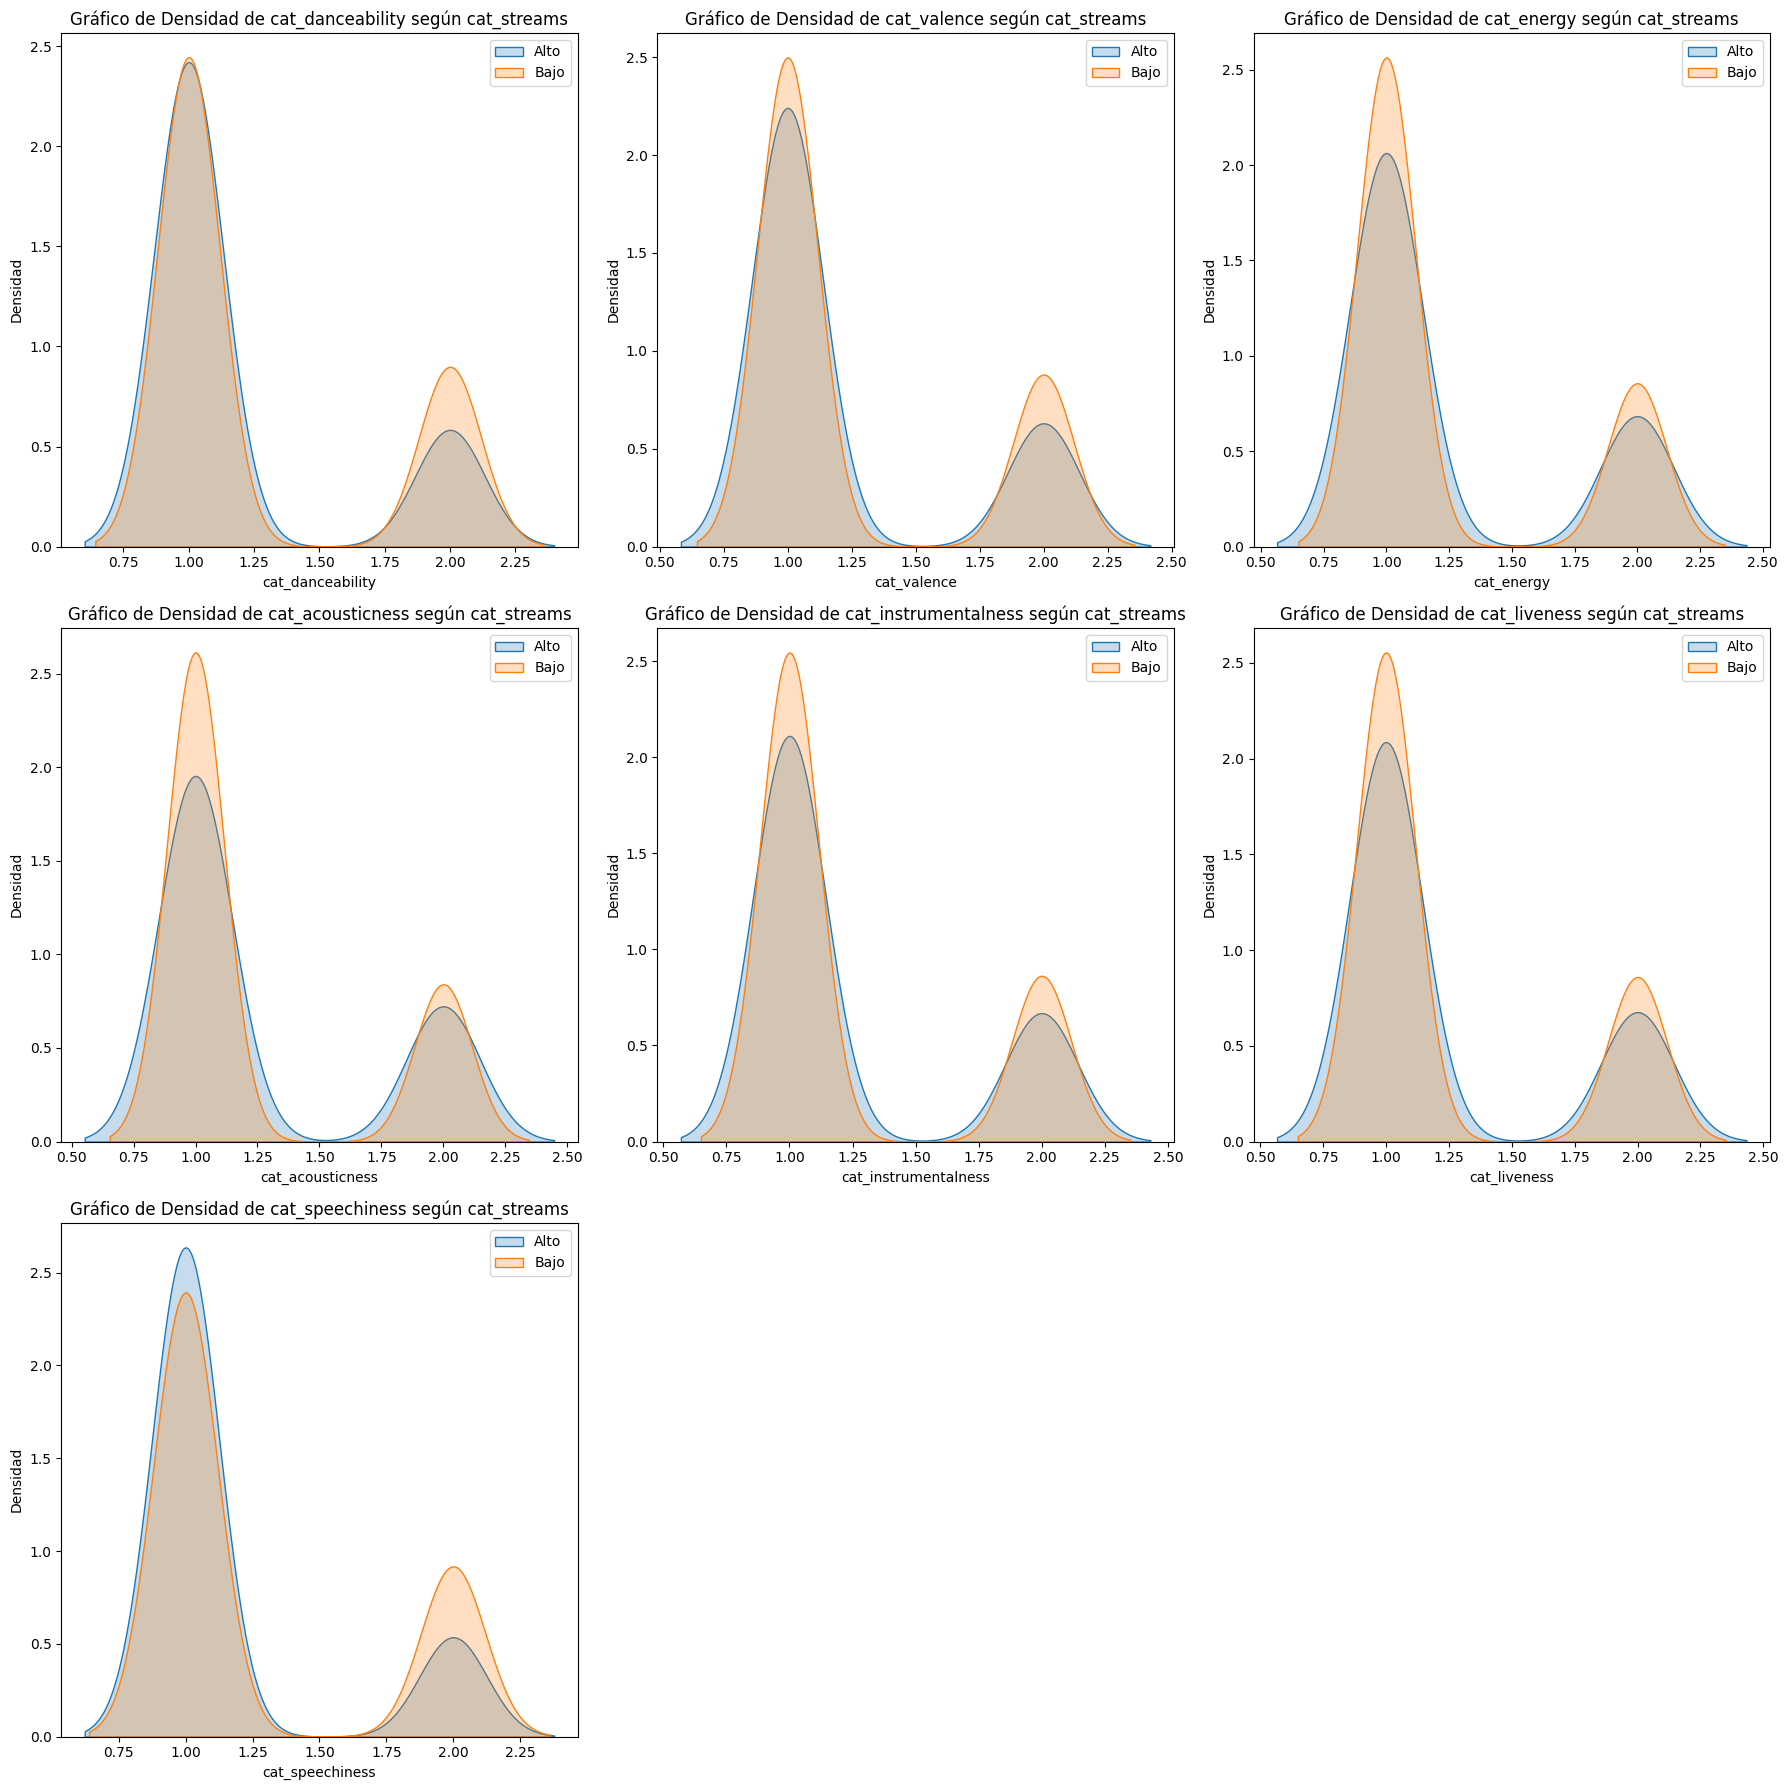

,caracteristica,t_stat,t_p_value,interpretacion_stat,interpretacion_p_value_t,u_stat,interpretacion_u_stat,u_p_value,interpretacion_p_value_u,resultado
0,cat_danceability,-2.4319,0.0154,Mucha diferencia,Diferencia no por azar,77973.0,Distribuciones similares,0.0218,Estadísticamente significativo,cat_danceability Influye positivamente
1,cat_valence,-1.2919,0.1971,Mucha diferencia,Diferencia por azar,80817.0,Distribuciones similares,0.2095,No hay suficiente evidencia,cat_valence No influye
2,cat_energy,-0.0433,0.9655,Medidas similares,Diferencia por azar,84135.0,Distribuciones similares,0.9656,No hay suficiente evidencia,cat_energy No influye
3,cat_acousticness,0.8077,0.4197,Medidas similares,Diferencia por azar,86505.0,Distribuciones similares,0.4110,No hay suficiente evidencia,cat_acousticness No influye
4,cat_instrumentalness,-0.3925,0.6949,Medidas similares,Diferencia por azar,83187.0,Distribuciones similares,0.6970,No hay suficiente evidencia,cat_instrumentalness No influye
5,cat_liveness,-0.2172,0.8282,Medidas similares,Diferencia por azar,83661.0,Distribuciones similares,0.8288,No hay suficiente evidencia,cat_liveness No influye
6,cat_speechiness,-3.6579,0.0003,Mucha diferencia,Diferencia no por azar,75129.0,Diferencias baja,0.0009,Estadísticamente significativo,cat_speechiness Influye positivamente


cat_danceability                       bajo              alto
streams_limpio     mean    545139168.492264  421928662.527426
                   count                711               237
                   median       305771063.0       248088961.0
                   std     590669328.336534  482297920.876257
                   min                 2762           1365184
                   max           3703895074        3562543890
danceability_%     mean           61.192958         84.270042
                   count                710               237
                   median              63.0              83.0
                   std            12.082729          4.607803
                   min                   23                78
                   max                   78                96
valence_%          mean                48.2         60.890295
                   count                710               237
                   median              47.0              62.0
                   std            23.506912         20.876671
                   min                    4                 6
                   max                   97                97
energy_%           mean           63.442254          66.64135
                   count                710               237
                   median              65.0              68.0
                   std            17.335857         13.858626
                   min                    9                14
                   max                   97                96
acousticness_%     mean           29.529577         20.147679
                   count                710               237
                   median              21.0              13.0
                   std            27.579015         19.098078
                   min                    0                 0
                   max                   97                83
instrumentalness_% mean            1.778873          0.945148
                   count                710               237
                   median               0.0               0.0
                   std             9.146533          5.652466
                   min                    0                 0
                   max                   91                51
liveness_%         mean           18.840845         16.156118
                   count                710               237
                   median              13.0              11.0
                   std            14.138695         12.157028
                   min                    3                 3
                   max                   97                66
speechiness_%      mean            9.153521         13.156118
                   count                710               237
                   median               5.0               8.0
                   std             9.316884          11.09268
                   min                    2                 3
                   max                   46                64

In [ ]:
# Autenticación
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

# Importación de librerías necesarias
from google.cloud import bigquery
import pandas as pd
import numpy as np
import scipy.stats as stats
from google.cloud import bigquery
from scipy.stats import ttest_ind, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Definición del project_id
project_id = 'proyectospotify-426316'
client = bigquery.Client(project=project_id)

# Definición del dataset
dataset = 'dataset'
table = 'dataset3'

# Consulta SQL
query = f"""
SELECT *
FROM {project_id}.{dataset}.{table}
"""

# Ejecutar la consulta y convertir los resultados en un DataFrame
df = client.query(query).to_dataframe()

# Mostrar las primeras filas del Dataframe
print(df.head())

transform_map = {'alto': 2, 'bajo': 1}

categorical_columns = ['cat_streams', 'cat_danceability', 'cat_valence', 'cat_energy', 'cat_acousticness', 'cat_instrumentalness', 'cat_liveness', 'cat_speechiness']
for column in categorical_columns:
    df[column] = df[column].map(transform_map)

results = []

characteristics = ['cat_danceability', 'cat_valence', 'cat_energy', 'cat_acousticness', 'cat_instrumentalness', 'cat_liveness', 'cat_speechiness']

for characteristic in characteristics:
    if characteristic in df.columns:
        df_filtered = df.dropna(subset=['cat_streams', characteristic])

        grupo_alto = df_filtered[df_filtered['cat_streams'] == 2][characteristic]
        grupo_bajo = df_filtered[df_filtered['cat_streams'] == 1][characteristic]

        if grupo_alto.count() == 0 or grupo_bajo.count() == 0:
            print(f'Se omite {characteristic} debido a un grupo vacío.')
            continue

        stat_t, p_value_t = ttest_ind(grupo_alto, grupo_bajo, equal_var=False)
        stat_t = round(stat_t, 4)
        p_value_t = round(p_value_t, 4)

        stat_u, p_value_u = mannwhitneyu(grupo_alto, grupo_bajo, alternative='two-sided')
        stat_u = round(stat_u, 4)
        p_value_u = round(p_value_u, 4)

        if p_value_t < 0.05 or p_value_u < 0.05:
            influencia = f"{characteristic} Influye positivamente"
        elif p_value_t > 0.05 and p_value_u > 0.05:
            influencia = f"{characteristic} No influye"
        else:
            influencia = f"{characteristic} Influye negativamente"

        if abs(stat_t) < 1:
            interpretacion_stat = "Medidas similares"
        else:
            interpretacion_stat = "Mucha diferencia"

        if p_value_t < 0.05:
            interpretacion_p_value_t = "Diferencia no por azar"
        else:
            interpretacion_p_value_t = "Diferencia por azar"

        if stat_u > len(grupo_alto) * len(grupo_bajo) / 2 + 1.96 * (len(grupo_alto) * len(grupo_bajo) * (len(grupo_alto) + len(grupo_bajo) + 1) / 12)**0.5:
            interpretacion_u_stat = "Diferencias alta"
        elif stat_u < len(grupo_alto) * len(grupo_bajo) / 2 - 1.96 * (len(grupo_alto) * len(grupo_bajo) * (len(grupo_alto) + len(grupo_bajo) + 1) / 12)**0.5:
            interpretacion_u_stat = "Diferencias baja"
        else:
            interpretacion_u_stat = "Distribuciones similares"

        if p_value_u < 0.05:
            interpretacion_p_value_u = "Estadísticamente significativo"
        else:
            interpretacion_p_value_u = "No hay suficiente evidencia"

        results.append({
            'caracteristica': characteristic,
            't_stat': stat_t,
            't_p_value': p_value_t,
            'interpretacion_stat': interpretacion_stat,
            'interpretacion_p_value_t': interpretacion_p_value_t,
            'u_stat': stat_u,
            'interpretacion_u_stat': interpretacion_u_stat,
            'u_p_value': p_value_u,
            'interpretacion_p_value_u': interpretacion_p_value_u,
            'resultado': influencia
        })

num_cols = 3
num_rows = math.ceil(len(results) / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 6 * num_rows))

for idx, row in enumerate(results):
    ax = axs[idx // num_cols, idx % num_cols]
    sns.kdeplot(df[df['cat_streams'] == 2][row['caracteristica']], fill=True, label='Alto', ax=ax)
    sns.kdeplot(df[df['cat_streams'] == 1][row['caracteristica']], fill=True, label='Bajo', ax=ax)
    ax.set_title(f'Gráfico de Densidad de {row["caracteristica"]} según cat_streams')
    ax.set_xlabel(row["caracteristica"])
    ax.set_ylabel('Densidad')
    ax.legend()

for i in range(len(results), num_rows * num_cols):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()

results_df = pd.DataFrame(results)
pd.options.display.max_colwidth = None
display(results_df[['caracteristica', 't_stat', 't_p_value', 'interpretacion_stat', 'interpretacion_p_value_t', 'u_stat', 'interpretacion_u_stat', 'u_p_value', 'interpretacion_p_value_u', 'resultado']])

# Crear un mapeo de valores numéricos a nombres
cat_danceability_map = {2: 'alto', 1: 'bajo'}
print()
# Tabla resumen de estadísticas
resumen_danceability = df[df['cat_danceability'].isin([2, 1])].groupby('cat_danceability').agg({
    'streams_limpio': ['mean', 'count', 'median', 'std', 'min', 'max'],
    'danceability_%': ['mean', 'count', 'median', 'std', 'min', 'max'],
    'valence_%': ['mean', 'count', 'median', 'std', 'min', 'max'],
    'energy_%': ['mean', 'count', 'median', 'std', 'min', 'max'],
    'acousticness_%': ['mean', 'count', 'median', 'std', 'min', 'max'],
    'instrumentalness_%': ['mean', 'count', 'median', 'std', 'min', 'max'],
    'liveness_%': ['mean', 'count', 'median', 'std', 'min', 'max'],
    'speechiness_%': ['mean', 'count', 'median', 'std', 'min', 'max']
})

# Renombrar el índice de la agrupación
resumen_danceability.rename(index=cat_danceability_map, inplace=True)

# Transponer la tabla para mostrar de manera adecuada
resumen_danceability = resumen_danceability.T

# Mostrar el resumen
display(resumen_danceability)




In [ ]:
# Guardar el DataFrame 'resumen_danceability' como CSV
resumen_danceability.to_csv('/content/resumen_danceability.csv')

# Descargar el archivo CSV a tu máquina local
from google.colab import files
files.download('/content/resumen_danceability.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Authenticated
  track_id track_name_limpio artist_name_limpio  artist_count release_date  \
0  1406287  I Wanna Be Yours     Arctic Monkeys             1   2013-01-01   
1  3921634       Blank Space       Taylor Swift             1   2014-01-01   
2  4796316             Style       Taylor Swift             1   2014-01-01   
3  4527090            Yellow      Chris Molitor             1   1999-01-01   
4  3126367      Viva La Vida           Coldplay             1   2008-01-01   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2013               1             1                 12859   
1           2014               1             1                 11434   
2           2014               1             1                  7830   
3           1999               1             1                 31358   
4           2008               1             1                 33898   

   in_spotify_charts  ...  speechiness_%  cat_streams  cat_danceability  \
0        

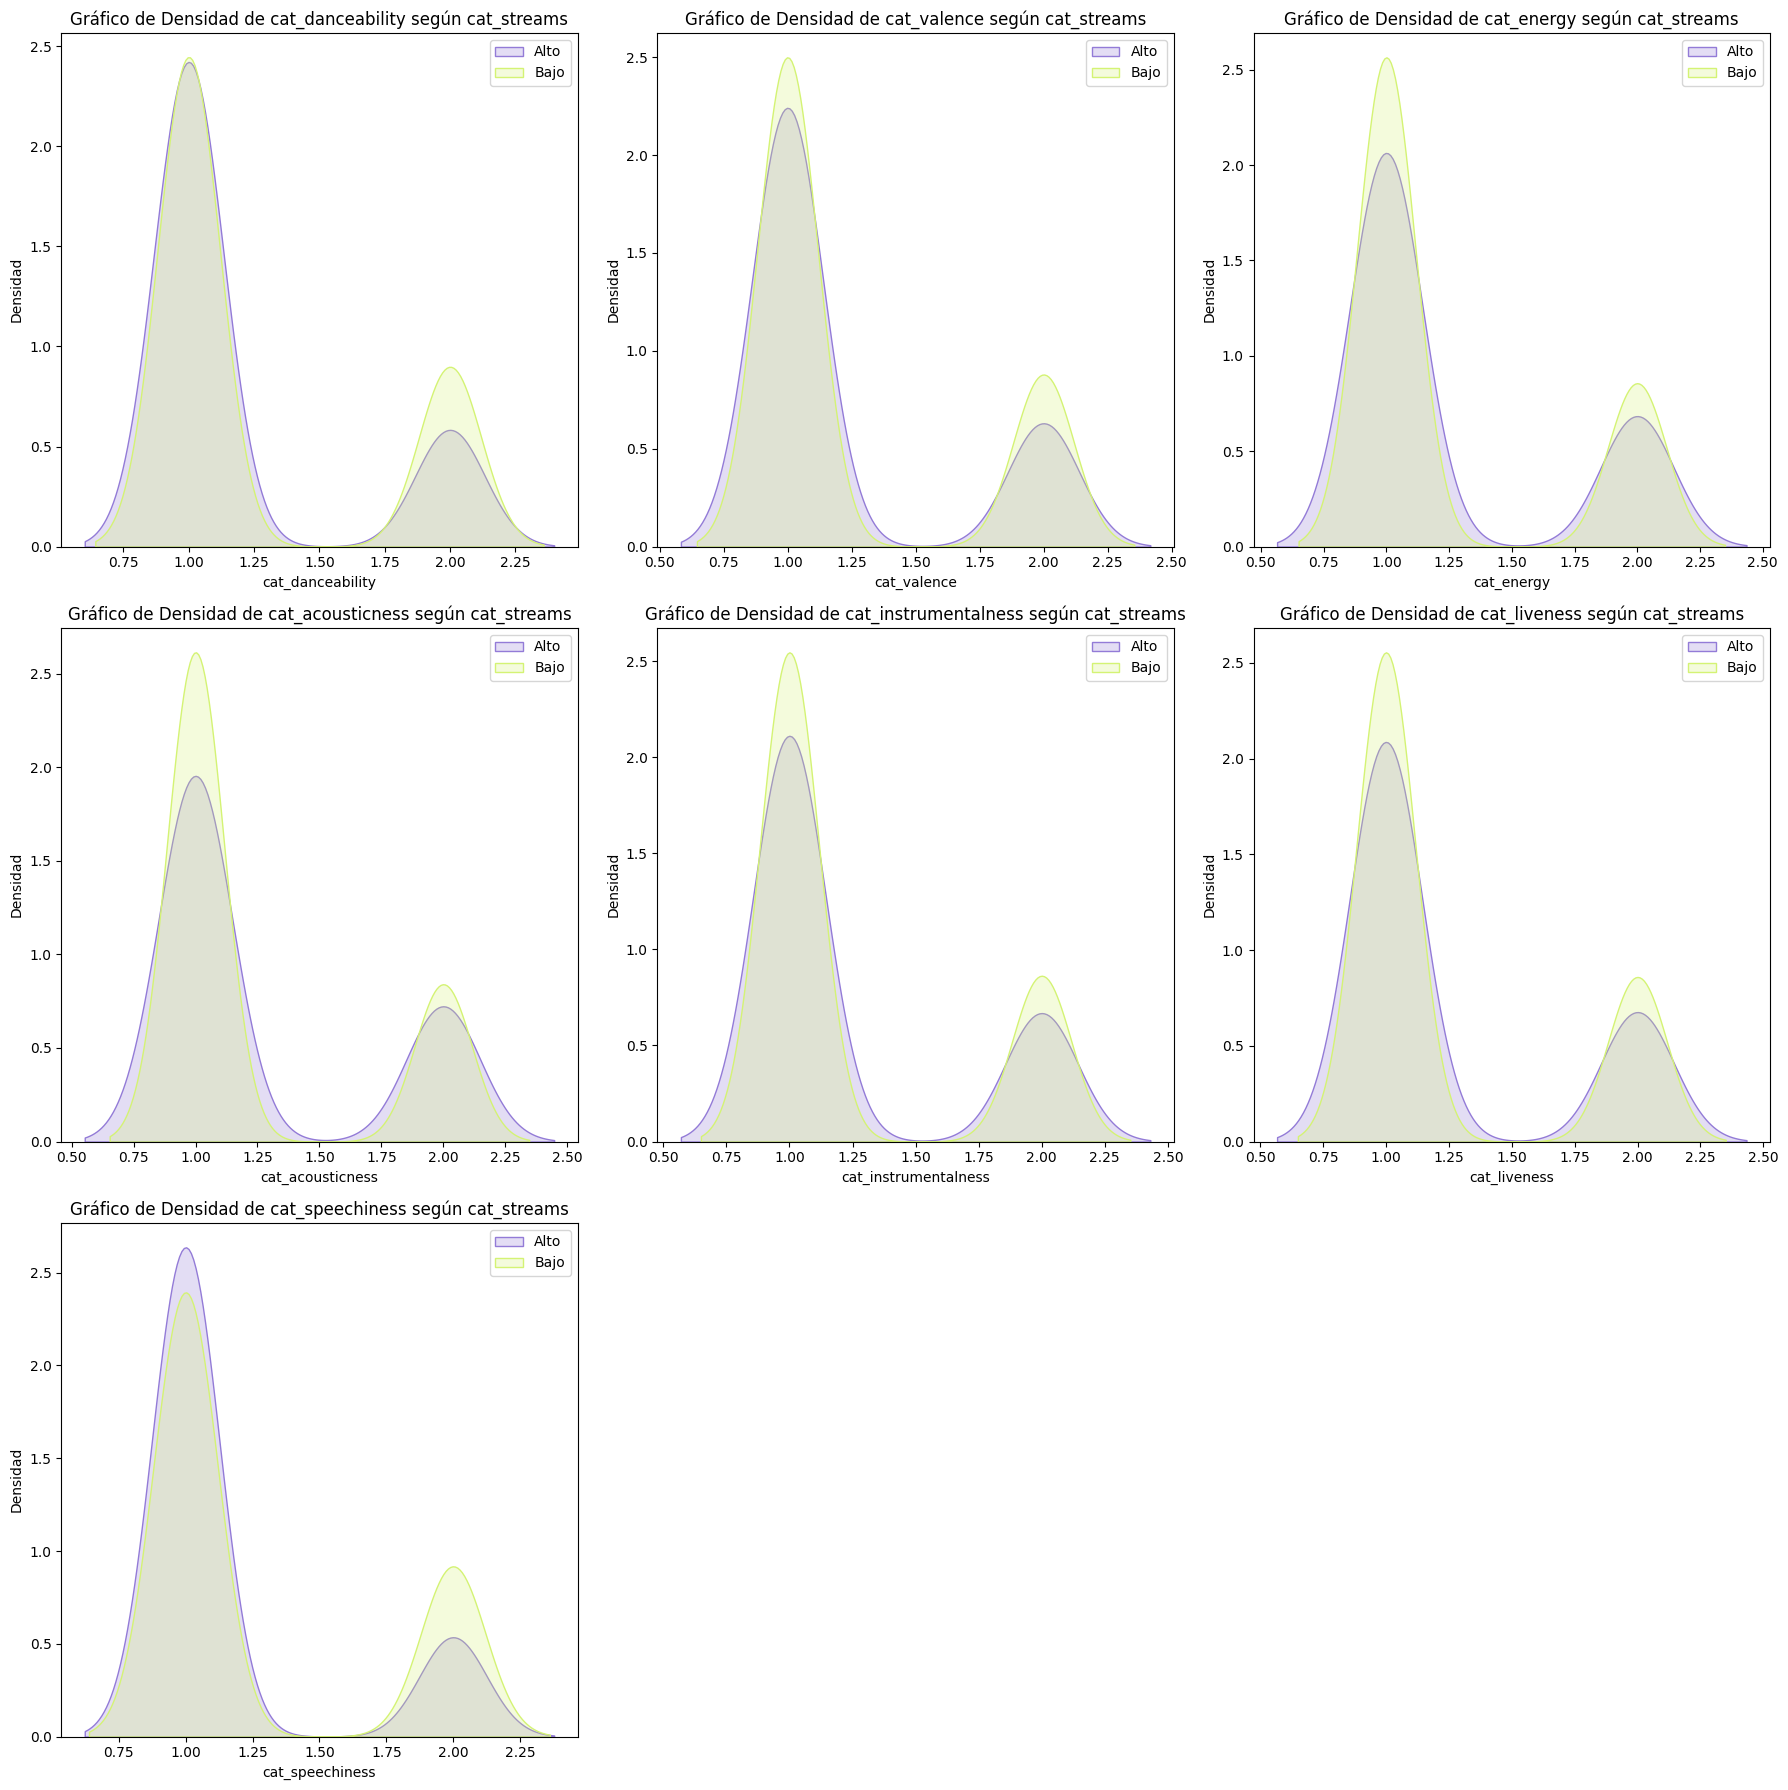

,caracteristica,t_stat,t_p_value,interpretacion_stat,interpretacion_p_value_t,u_stat,interpretacion_u_stat,u_p_value,interpretacion_p_value_u,resultado
0,cat_danceability,-2.4319,0.0154,Mucha diferencia,Diferencia no por azar,77973.0,Distribuciones similares,0.0218,Estadísticamente significativo,cat_danceability Influye positivamente
1,cat_valence,-1.2919,0.1971,Mucha diferencia,Diferencia por azar,80817.0,Distribuciones similares,0.2095,No hay suficiente evidencia,cat_valence No influye
2,cat_energy,-0.0433,0.9655,Medidas similares,Diferencia por azar,84135.0,Distribuciones similares,0.9656,No hay suficiente evidencia,cat_energy No influye
3,cat_acousticness,0.8077,0.4197,Medidas similares,Diferencia por azar,86505.0,Distribuciones similares,0.4110,No hay suficiente evidencia,cat_acousticness No influye
4,cat_instrumentalness,-0.3925,0.6949,Medidas similares,Diferencia por azar,83187.0,Distribuciones similares,0.6970,No hay suficiente evidencia,cat_instrumentalness No influye
5,cat_liveness,-0.2172,0.8282,Medidas similares,Diferencia por azar,83661.0,Distribuciones similares,0.8288,No hay suficiente evidencia,cat_liveness No influye
6,cat_speechiness,-3.6579,0.0003,Mucha diferencia,Diferencia no por azar,75129.0,Diferencias baja,0.0009,Estadísticamente significativo,cat_speechiness Influye positivamente


cat_danceability                       bajo              alto
streams_limpio     mean    545139168.492264  421928662.527426
                   count                711               237
                   median       305771063.0       248088961.0
                   std     590669328.336534  482297920.876257
                   min                 2762           1365184
                   max           3703895074        3562543890
danceability_%     mean           61.192958         84.270042
                   count                710               237
                   median              63.0              83.0
                   std            12.082729          4.607803
                   min                   23                78
                   max                   78                96
valence_%          mean                48.2         60.890295
                   count                710               237
                   median              47.0              62.0
                   std            23.506912         20.876671
                   min                    4                 6
                   max                   97                97
energy_%           mean           63.442254          66.64135
                   count                710               237
                   median              65.0              68.0
                   std            17.335857         13.858626
                   min                    9                14
                   max                   97                96
acousticness_%     mean           29.529577         20.147679
                   count                710               237
                   median              21.0              13.0
                   std            27.579015         19.098078
                   min                    0                 0
                   max                   97                83
instrumentalness_% mean            1.778873          0.945148
                   count                710               237
                   median               0.0               0.0
                   std             9.146533          5.652466
                   min                    0                 0
                   max                   91                51
liveness_%         mean           18.840845         16.156118
                   count                710               237
                   median              13.0              11.0
                   std            14.138695         12.157028
                   min                    3                 3
                   max                   97                66
speechiness_%      mean            9.153521         13.156118
                   count                710               237
                   median               5.0               8.0
                   std             9.316884          11.09268
                   min                    2                 3
                   max                   46                64

In [ ]:
# Autenticación
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

# Importación de librerías necesarias
from google.cloud import bigquery
import pandas as pd
import numpy as np
import scipy.stats as stats
from google.cloud import bigquery
from scipy.stats import ttest_ind, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Definición del project_id
project_id = 'proyectospotify-426316'
client = bigquery.Client(project=project_id)

# Definición del dataset
dataset = 'dataset'
table = 'dataset3'

# Consulta SQL
query = f"""
SELECT *
FROM {project_id}.{dataset}.{table}
"""

# Ejecutar la consulta y convertir los resultados en un DataFrame
df = client.query(query).to_dataframe()

# Mostrar las primeras filas del Dataframe
print(df.head())

transform_map = {'alto': 2, 'bajo': 1}

categorical_columns = ['cat_streams', 'cat_danceability', 'cat_valence', 'cat_energy', 'cat_acousticness', 'cat_instrumentalness', 'cat_liveness', 'cat_speechiness']
for column in categorical_columns:
    df[column] = df[column].map(transform_map)

results = []

characteristics = ['cat_danceability', 'cat_valence', 'cat_energy', 'cat_acousticness', 'cat_instrumentalness', 'cat_liveness', 'cat_speechiness']

for characteristic in characteristics:
    if characteristic in df.columns:
        df_filtered = df.dropna(subset=['cat_streams', characteristic])

        grupo_alto = df_filtered[df_filtered['cat_streams'] == 2][characteristic]
        grupo_bajo = df_filtered[df_filtered['cat_streams'] == 1][characteristic]

        if grupo_alto.count() == 0 or grupo_bajo.count() == 0:
            print(f'Se omite {characteristic} debido a un grupo vacío.')
            continue

        stat_t, p_value_t = ttest_ind(grupo_alto, grupo_bajo, equal_var=False)
        stat_t = round(stat_t, 4)
        p_value_t = round(p_value_t, 4)

        stat_u, p_value_u = mannwhitneyu(grupo_alto, grupo_bajo, alternative='two-sided')
        stat_u = round(stat_u, 4)
        p_value_u = round(p_value_u, 4)

        if p_value_t < 0.05 or p_value_u < 0.05:
            influencia = f"{characteristic} Influye positivamente"
        elif p_value_t > 0.05 and p_value_u > 0.05:
            influencia = f"{characteristic} No influye"
        else:
            influencia = f"{characteristic} Influye negativamente"

        if abs(stat_t) < 1:
            interpretacion_stat = "Medidas similares"
        else:
            interpretacion_stat = "Mucha diferencia"

        if p_value_t < 0.05:
            interpretacion_p_value_t = "Diferencia no por azar"
        else:
            interpretacion_p_value_t = "Diferencia por azar"

        if stat_u > len(grupo_alto) * len(grupo_bajo) / 2 + 1.96 * (len(grupo_alto) * len(grupo_bajo) * (len(grupo_alto) + len(grupo_bajo) + 1) / 12)**0.5:
            interpretacion_u_stat = "Diferencias alta"
        elif stat_u < len(grupo_alto) * len(grupo_bajo) / 2 - 1.96 * (len(grupo_alto) * len(grupo_bajo) * (len(grupo_alto) + len(grupo_bajo) + 1) / 12)**0.5:
            interpretacion_u_stat = "Diferencias baja"
        else:
            interpretacion_u_stat = "Distribuciones similares"

        if p_value_u < 0.05:
            interpretacion_p_value_u = "Estadísticamente significativo"
        else:
            interpretacion_p_value_u = "No hay suficiente evidencia"

        results.append({
            'caracteristica': characteristic,
            't_stat': stat_t,
            't_p_value': p_value_t,
            'interpretacion_stat': interpretacion_stat,
            'interpretacion_p_value_t': interpretacion_p_value_t,
            'u_stat': stat_u,
            'interpretacion_u_stat': interpretacion_u_stat,
            'u_p_value': p_value_u,
            'interpretacion_p_value_u': interpretacion_p_value_u,
            'resultado': influencia
        })

num_cols = 3
num_rows = math.ceil(len(results) / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 6 * num_rows))

for idx, row in enumerate(results):
    ax = axs[idx // num_cols, idx % num_cols]
    sns.kdeplot(df[df['cat_streams'] == 2][row['caracteristica']], fill=True, label='Alto', ax=ax, color='#937bd7')
    sns.kdeplot(df[df['cat_streams'] == 1][row['caracteristica']], fill=True, label='Bajo', ax=ax, color='#d4f374')
    ax.set_title(f'Gráfico de Densidad de {row["caracteristica"]} según cat_streams')
    ax.set_xlabel(row["caracteristica"])
    ax.set_ylabel('Densidad')
    ax.legend()

for i in range(len(results), num_rows * num_cols):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()

results_df = pd.DataFrame(results)
pd.options.display.max_colwidth = None
display(results_df[['caracteristica', 't_stat', 't_p_value', 'interpretacion_stat', 'interpretacion_p_value_t', 'u_stat', 'interpretacion_u_stat', 'u_p_value', 'interpretacion_p_value_u', 'resultado']])

# Crear un mapeo de valores numéricos a nombres
cat_danceability_map = {2: 'alto', 1: 'bajo'}

# Tabla resumen de estadísticas
resumen_danceability = df[df['cat_danceability'].isin([2, 1])].groupby('cat_danceability').agg({
    'streams_limpio': ['mean', 'count', 'median', 'std', 'min', 'max'],
    'danceability_%': ['mean', 'count', 'median', 'std', 'min', 'max'],
    'valence_%': ['mean', 'count', 'median', 'std', 'min', 'max'],
    'energy_%': ['mean', 'count', 'median', 'std', 'min', 'max'],
    'acousticness_%': ['mean', 'count', 'median', 'std', 'min', 'max'],
    'instrumentalness_%': ['mean', 'count', 'median', 'std', 'min', 'max'],
    'liveness_%': ['mean', 'count', 'median', 'std', 'min', 'max'],
    'speechiness_%': ['mean', 'count', 'median', 'std', 'min', 'max']
})

# Renombrar el índice de la agrupación
resumen_danceability.rename(index=cat_danceability_map, inplace=True)

# Transponer la tabla para mostrar de manera adecuada
resumen_danceability = resumen_danceability.T

# Mostrar el resumen
display(resumen_danceability)
